In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.6.2
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.6.2
keras.api._v2.keras 2.6.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# 多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
# 多的输出，是使用hidden2作为一个输入，只用deep做预测
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_wide, input_deep],
                           outputs = [output, output2])
        

model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [6]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

# 因为有多个output，所以需要有多个y
history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    [y_train, y_train],
                    validation_data = (
                        [x_valid_scaled_wide, x_valid_scaled_deep],
                        [y_valid, y_valid]),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 3.3343 - dense_2_loss: 0.8766 - dense_3_loss: 2.4577 - val_loss: 1.5468 - val_dense_2_loss: 0.5390 - val_dense_3_loss: 1.0078
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0940 - dense_2_loss: 0.4490 - dense_3_loss: 0.6450 - val_loss: 1.0238 - val_dense_2_loss: 0.4365 - val_dense_3_loss: 0.5872
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9533 - dense_2_loss: 0.4072 - dense_3_loss: 0.5461 - val_loss: 0.9438 - val_dense_2_loss: 0.4051 - val_dense_3_loss: 0.5387
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.9077 - dense_2_loss: 0.3898 - dense_3_loss: 0.5179 - val_loss: 0.9485 - val_dense_2_loss: 0.4059 - val_dense_3_loss: 0.5426
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8746 - dense_2_loss: 0.3796 - dense_3_loss: 0.4950 - val_loss: 0.8883 - val_dense_2_loss: 0.3886 - val_dense_3_loss: 0.

In [7]:
print(history.history)

{'loss': [3.334294319152832, 1.0939983129501343, 0.9532966017723083, 0.9077310562133789, 0.8745843768119812, 0.856681227684021, 0.8307384848594666, 0.8075982332229614, 0.7873464226722717, 0.776170551776886, 0.7639864683151245, 0.7692761421203613, 0.7570008039474487, 0.7524088621139526, 0.728119969367981, 0.7250105142593384, 0.743390679359436, 0.7148936986923218, 0.7040526270866394, 0.7059122920036316, 0.7007660865783691, 0.7004781365394592, 0.6906393766403198, 0.6911771893501282, 0.6863033771514893, 0.6827049851417542, 0.6824612617492676, 0.6787396669387817, 0.6763783097267151, 0.6729381084442139], 'dense_2_loss': [0.8765668869018555, 0.449008971452713, 0.4072249233722687, 0.38981372117996216, 0.3796127140522003, 0.37761908769607544, 0.36794495582580566, 0.3603244423866272, 0.35305896401405334, 0.35029181838035583, 0.34730666875839233, 0.3521178960800171, 0.3475784957408905, 0.34344953298568726, 0.33369705080986023, 0.33338478207588196, 0.34195226430892944, 0.32901236414909363, 0.32388

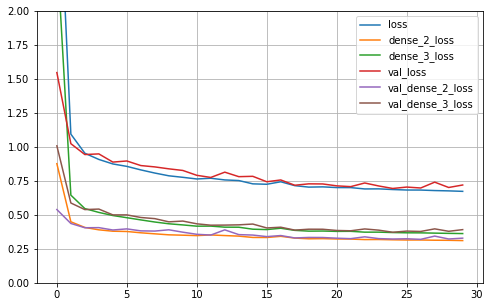

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
plot_learning_curves(history)

In [9]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep],
               [y_test, y_test], verbose=0)

[0.6981797814369202, 0.32557564973831177, 0.3726041615009308]